In [6]:
from matplotlib.pyplot import figure
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from csv import reader
import sys  

In [26]:
df = pd.read_csv(r'/Users/hernanadasme/Downloads/Export_herno_Boxinglota_20221222010841/rectype-63.csv')

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [28]:
df.rename({'Source': 'source'}, axis = 1, inplace=True)
df.rename({'Source year': 'source_year'}, axis = 1, inplace=True)
df.rename({'boxer challenging RecordTitle': 'boxer_challenging'}, axis = 1, inplace=True)
df.rename({'boxer challenged RecordTitle': 'boxer_challenged'}, axis = 1, inplace=True)
df.rename({'Location Description': 'location_descp'}, axis = 1, inplace=True)
df.rename({'Status': 'status'}, axis = 1, inplace=True)
df.rename({'Conditions': 'condition'}, axis = 1, inplace=True)
df.rename({'City':'city'}, axis = 1, inplace=True)
df.rename({'Location':'location'}, axis = 1, inplace=True)
df.rename({'Challenge H-ID': 'challenge_id'}, axis = 1, inplace=True)
df.rename({'boxer challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
df.rename({'boxer challenged H-ID': 'challenged_id'}, axis = 1, inplace=True)

In [29]:
df.head()

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,Basis,location_descp,city,location
0,972,Araya v. Bolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780.0,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",Los Andes,POINT(-70.600875 -32.835752)
1,975,Valdes v. Pérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272.0,"Pérez, Amador",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.688871 -32.833203)
2,978,Ortiz v. Araya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882.0,"Araya, Manuel",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.598582 -32.833016)
3,985,Valdes v. Gallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827.0,"Gallardo, Pedro",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.593621 -32.834478)
4,986,Silva v. Iñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987.0,"Iñiguez, Mario",accepted,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   challenge_id       178 non-null    int64         
 1   rec_Title          178 non-null    object        
 2   source             178 non-null    object        
 3   source_year        178 non-null    datetime64[ns]
 4   challenging_id     178 non-null    object        
 5   boxer_challenging  178 non-null    object        
 6   challenged_id      177 non-null    float64       
 7   boxer_challenged   177 non-null    object        
 8   status             39 non-null     object        
 9   condition          24 non-null     object        
 10  Basis              19 non-null     object        
 11  location_descp     7 non-null      object        
 12  city               140 non-null    object        
 13  location           141 non-null    object        
dtypes: datetim

In [31]:
df['source_year'] =  pd.to_datetime(df['source_year'], errors='ignore')

In [10]:
B = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id')
# Adding metadata to the nodes
for box, row in df.iterrows():
    B.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    B.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
#print(B.nodes(data=True))
print(len(B.nodes()))

180


In [14]:
# Adding metadata to the edges
for r, d in df.iterrows():
    B.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'])

In [12]:
print(B.nodes(data=True))

[(865, {'name': 'Castillo, Ernesto'}), (836, {'name': 'Baeza, Florencio'}), (882, {'name': 'Araya, Manuel'}), (780, {'name': 'Bolli, Carlos'}), (833, {'name': 'Valdes, Mario'}), (272, {'name': 'Pérez, Amador'}), (976, {'name': 'Ortiz, Rafael'}), (827, {'name': 'Gallardo, Pedro'}), (189, {'name': 'Silva, Carlos'}), (987, {'name': 'Iñiguez, Mario'}), (302, {'name': 'Flores, Sara'}), (303, {'name': 'Farrafino, Clementina'}), (891, {'name': 'Huerta, Francisco'}), (573, {'name': 'Giaverini, Oscar'}), (158, {'name': 'Tapia, Julio'}), (1001, {'name': 'Inostroza, Ruperto'}), (1003, {'name': 'Alley, Juan'}), (321, {'name': 'Salinas, Juan'}), (647, {'name': 'Olguín, Humberto'}), (423, {'name': 'Valdenegro'}), (1006, {'name': 'Henriquez'}), (1008, {'name': 'Leiva'}), (332, {'name': 'Acosta, Luis J.'}), (1010, {'name': 'Molina, Erasmo'}), (1012, {'name': 'Parra, Routier'}), (502, {'name': 'Rios, Agustin'}), (1014, {'name': 'Arratia, Jose'}), (143, {'name': 'Caldera, Francisco'}), (572, {'name': 'A

In [15]:
print(B.edges(data=True))

[(865, 836, {'date': Timestamp('1928-03-02 00:00:00')}), (836, 835, {'date': Timestamp('1927-12-04 00:00:00')}), (836, 876, {'date': Timestamp('1928-02-09 00:00:00')}), (836, 886, {'date': Timestamp('1928-02-16 00:00:00')}), (836, 1355, {'date': Timestamp('1928-02-26 00:00:00')}), (836, 826, {'date': Timestamp('1928-02-26 00:00:00')}), (836, 833, {'date': Timestamp('1928-02-26 00:00:00')}), (882, 780, {'date': Timestamp('1928-04-05 00:00:00')}), (882, 976, {'date': Timestamp('1928-04-08 00:00:00')}), (833, 272, {'date': Timestamp('1928-04-08 00:00:00')}), (833, 827, {'date': Timestamp('1928-01-01 00:00:00')}), (833, 1284, {'date': Timestamp('1925-07-10 00:00:00')}), (189, 987, {'date': Timestamp('1924-02-01 00:00:00')}), (302, 303, {'date': Timestamp('1924-03-07 00:00:00')}), (891, 573, {'date': Timestamp('1924-02-01 00:00:00')}), (573, 143, {'date': Timestamp('1924-04-04 00:00:00')}), (158, 1001, {'date': Timestamp('1924-03-07 00:00:00')}), (1003, 321, {'date': Timestamp('1924-03-07 0

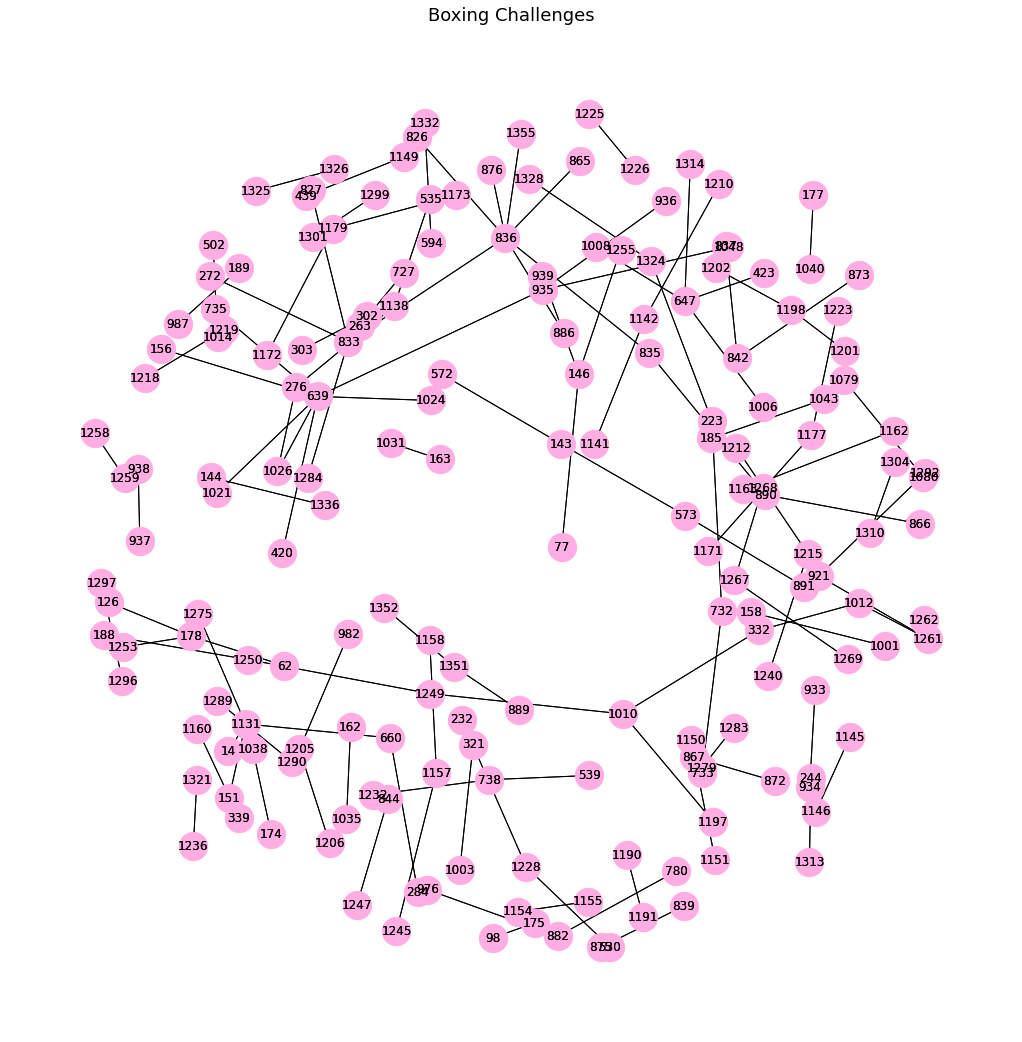

In [30]:
from datetime import datetime
# Instantiate a new graph: G_sub
C_sub = nx.Graph()
# Add nodes from the original graph
C_sub.add_nodes_from(B.nodes(data=True))
# Add edges using a list comprehension with one conditional on the edge dates.
C_sub.add_edges_from([(u, v, d) for u, v, d in B.edges(data=True)])
pos = nx.spring_layout(B, k =0.3)
figure(figsize=(14, 14) )
nx.draw(B, pos, with_labels = True, node_size = 800, font_size=12, node_color ='#FFADE3')
nx.draw_networkx_edges(B, pos, arrows=True, arrowsize=8, arrowstyle="->")
nx.draw_networkx_labels(B, pos, font_size=12)
plt.title('Boxing Challenges', fontsize=18)
fig1 = plt.gcf()
#fig1.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentation_03.jpg", dpi=600) 

In [73]:
challengers = [node for node in B.nodes() if node in df.challenging_id.unique()]
challenged = [node for node in B.nodes() if node in df.challenged_id.unique()]

In [36]:
size = [B.degree(node) * 300 for node in B.nodes() if node in df.challenging_id.unique()]

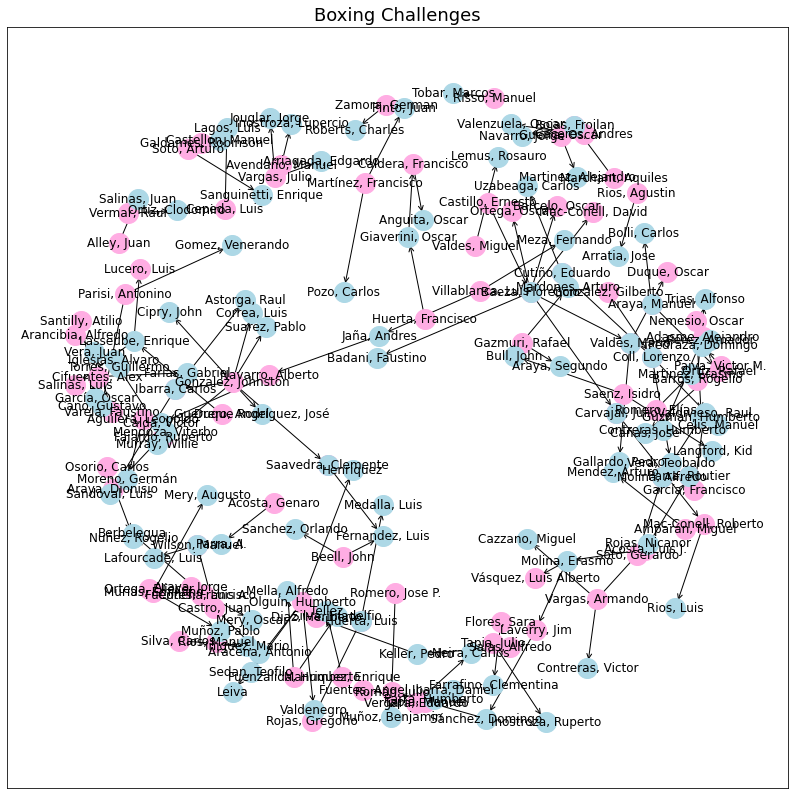

In [87]:
from datetime import datetime
# Instantiate a new graph: G_sub
C_sub = nx.Graph()
# Add nodes from the original graph
C_sub.add_nodes_from(B.nodes(data=True))
# Add edges using a list comprehension with one conditional on the edge dates.
C_sub.add_edges_from([(u, v, d) for u, v, d in B.edges(data=True)])
pos = nx.spring_layout(B, k =0.3)
figure(figsize=(14, 14) )
nx.draw_networkx_nodes(B, pos, nodelist = challengers, node_size= 400 , node_color ='#FFADE3')
nx.draw_networkx_nodes(B, pos, nodelist = challenged, node_size = 400, node_color ='lightblue')
nx.draw_networkx_edges(B, pos, arrows=True, arrowsize=12, arrowstyle="->")
nx.draw_networkx_labels(B, pos, labels, font_size=12)
plt.title('Boxing Challenges', fontsize=18)
fig1 = plt.gcf()
#fig1.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentation_03.jpg", dpi=600) 

In [28]:
print(len(C_sub.edges(data=True)))

120


In [51]:
challengers_dict = dict(zip(challengers, challengers))
challenged_dict = dict(zip(challenged, challenged))

In [69]:
for n,b in B.nodes.items():
    
    
    
        

('name', 'Castillo, Ernesto')
('name', 'Baeza, Florencio')
('name', 'Araya, Manuel')
('name', 'Bolli, Carlos')
('name', 'Valdes, Mario')
('name', 'Pérez, Amador')
('name', 'Ortiz, Rafael')
('name', 'Gallardo, Pedro')
('name', 'Silva, Carlos')
('name', 'Iñiguez, Mario')
('name', 'Flores, Sara')
('name', 'Farrafino, Clementina')
('name', 'Huerta, Francisco')
('name', 'Giaverini, Oscar')
('name', 'Tapia, Julio')
('name', 'Inostroza, Ruperto')
('name', 'Alley, Juan')
('name', 'Salinas, Juan')
('name', 'Olguín, Humberto')
('name', 'Valdenegro')
('name', 'Henriquez')
('name', 'Leiva')
('name', 'Acosta, Luis J.')
('name', 'Molina, Erasmo')
('name', 'Parra, Routier')
('name', 'Rios, Agustin')
('name', 'Arratia, Jose')
('name', 'Caldera, Francisco')
('name', 'Anguita, Oscar')
('name', 'Guerrero, Angel')
('name', 'Lasseube, Enrique')
('name', 'Gonzalez, Johnston')
('name', 'Suarez, Pablo')
('name', 'Correa, Luis')
('name', 'Cipry, John')
('name', 'Saavedra, Clemente')
('name', 'Villablanca, Luis

In [85]:
print(type(labels))

<class 'dict'>


In [86]:
print(labels)

{865: 'Castillo, Ernesto', 836: 'Baeza, Florencio', 882: 'Araya, Manuel', 780: 'Bolli, Carlos', 833: 'Valdes, Mario', 272: 'Pérez, Amador', 976: 'Ortiz, Rafael', 827: 'Gallardo, Pedro', 189: 'Silva, Carlos', 987: 'Iñiguez, Mario', 302: 'Flores, Sara', 303: 'Farrafino, Clementina', 891: 'Huerta, Francisco', 573: 'Giaverini, Oscar', 158: 'Tapia, Julio', 1001: 'Inostroza, Ruperto', 1003: 'Alley, Juan', 321: 'Salinas, Juan', 647: 'Olguín, Humberto', 423: 'Valdenegro', 1006: 'Henriquez', 1008: 'Leiva', 332: 'Acosta, Luis J.', 1010: 'Molina, Erasmo', 1012: 'Parra, Routier', 502: 'Rios, Agustin', 1014: 'Arratia, Jose', 143: 'Caldera, Francisco', 572: 'Anguita, Oscar', 77: 'Guerrero, Angel', 146: 'Lasseube, Enrique', 639: 'Gonzalez, Johnston', 1021: 'Suarez, Pablo', 735: 'Correa, Luis', 1024: 'Cipry, John', 1026: 'Saavedra, Clemente', 732: 'Villablanca, Luis', 223: 'Jaña, Andres', 733: 'Meza, Fernando', 163: 'García, Francisco', 1031: 'Valdivieso, Raul', 162: 'Guerra, Oscar', 1035: 'Martinez, 

In [ ]:
kamada_kawai_layout

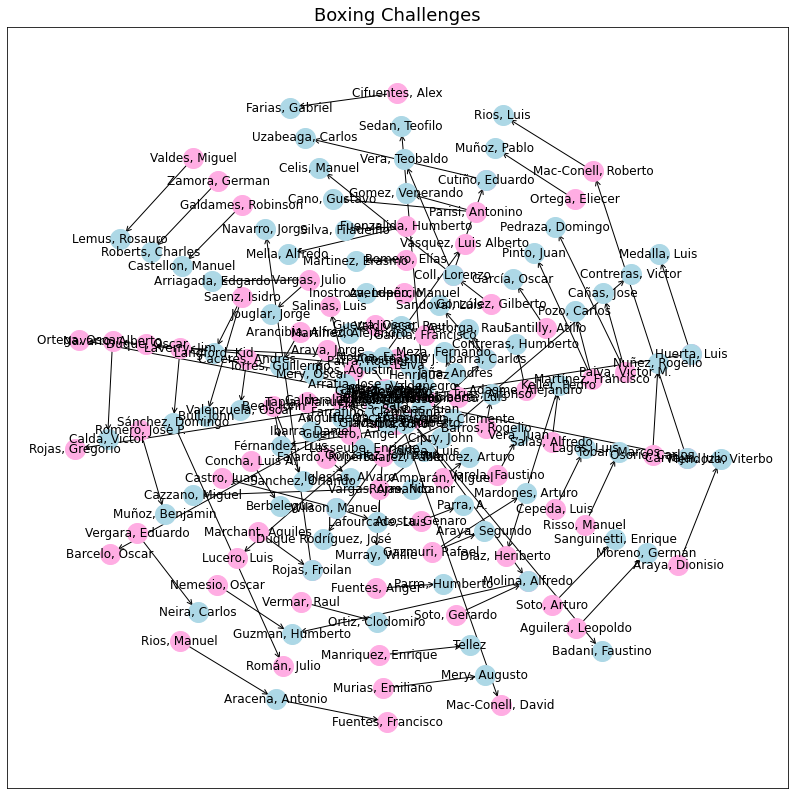

In [96]:
# Instantiate a new graph: G_sub
D_sub = nx.Graph()
# Add nodes from the original graph
D_sub.add_nodes_from(B.nodes(data=True))
# Add edges using a list comprehension with one conditional on the edge dates.
D_sub.add_edges_from([(u, v, d) for u, v, d in B.edges(data=True)])
pos = nx.spiral_layout(B)
figure(figsize=(14, 14) )
nx.draw_networkx_nodes(B, pos, nodelist = challengers, node_size= 400 , node_color ='#FFADE3')
nx.draw_networkx_nodes(B, pos, nodelist = challenged, node_size = 400, node_color ='lightblue')
nx.draw_networkx_edges(B, pos, arrows=True, arrowsize=12, arrowstyle="->")
nx.draw_networkx_labels(B, pos, labels, font_size=12)
plt.title('Boxing Challenges', fontsize=18)
fig1 = plt.gcf()
#fig1.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentation_03.jpg", dpi=600)